In [1]:
import numpy as np
import pandas as pd
#import visuals as vs
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../ibm-watson-marketing-customer-value-data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis - Copy.csv")
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
premium_price = data['Monthly Premium Auto']
features = data.drop('Monthly Premium Auto', axis=1)

In [4]:
premium_price.describe()

count    9134.000000
mean       93.219291
std        34.407967
min        61.000000
25%        68.000000
50%        83.000000
75%       109.000000
max       298.000000
Name: Monthly Premium Auto, dtype: float64

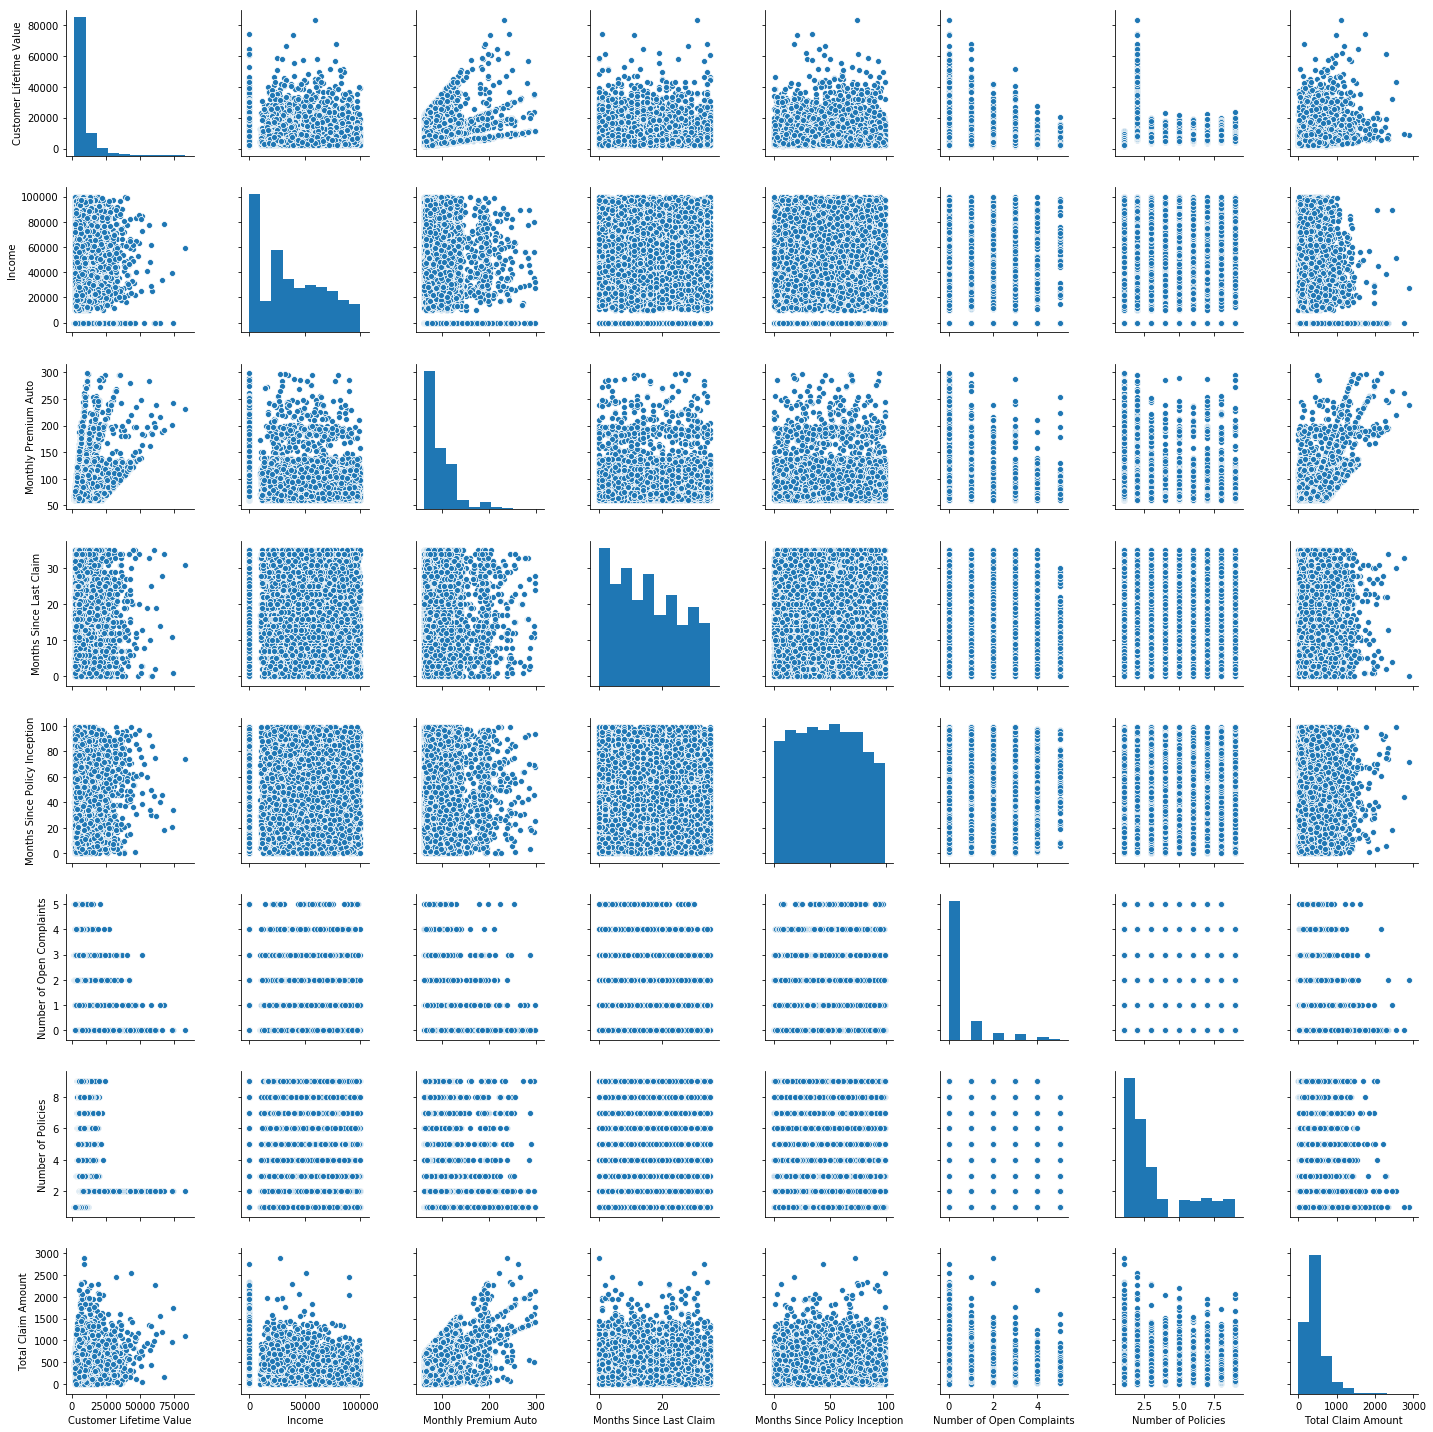

In [5]:
sns.pairplot(data, height=2.5)
plt.tight_layout()

In [6]:
# Do Binary Encoding
#selected_features = data[['State', 'Customer Lifetime Value','Coverage','Education', 
#                          'EmploymentStatus', 'Gender','Income','Location Code',
#                          'Marital Status','Monthly Premium Auto', 'Months Since Last Claim',
#                          'Months Since Policy Inception', 'Number of Open Complaints',
#                          'Number of Policies','Policy Type', 'Total Claim Amount',
#                          'Vehicle Class','Vehicle Size']]
#selected_features = data[['State', 'Customer Lifetime Value','Coverage','Education', 
#                          'EmploymentStatus', 'Gender', 'Marital Status','Monthly Premium Auto',
#                          'Number of Policies','Policy Type', 'Total Claim Amount', 'Vehicle Size']]
#selected_features = data[['Customer Lifetime Value','Coverage','Education', 
#                          'EmploymentStatus', 'Marital Status','Monthly Premium Auto',
#                          'Number of Policies','Policy Type', 'Total Claim Amount', 'Vehicle Class', 
#                          'Vehicle Size','State']]
selected_features = data[['Vehicle Class', 'Monthly Premium Auto', 'Vehicle Size','State', 
                          'Customer Lifetime Value', 'Total Claim Amount', 'Coverage']]

data_encode = selected_features
data_binary_encoded = pd.get_dummies(data_encode)
data_binary_encoded.head()

,Monthly Premium Auto,Customer Lifetime Value,Total Claim Amount,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Coverage_Basic,Coverage_Extended,Coverage_Premium
0,69,2763.519279,384.811147,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0
1,94,6979.535903,1131.464935,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
2,108,12887.431650,566.472247,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
3,106,7645.861827,529.881344,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
4,73,2813.692575,138.130879,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0


In [7]:
#sns_plot = sns.pairplot(data_binary_encoded, height=2.5)
#sns_plot.savefig("output.png")
#plt.tight_layout()

In [8]:
features = data_binary_encoded.drop('Monthly Premium Auto', axis=1)
X = features
y = data_binary_encoded["Monthly Premium Auto"].values.reshape(-1, 1)
print(X.shape, y.shape)

(9134, 19) (9134, 1)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

C:\Users\j6921\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\j6921\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

C:\Users\j6921\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\Users\j6921\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  
C:\Users\j6921\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\j6921\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

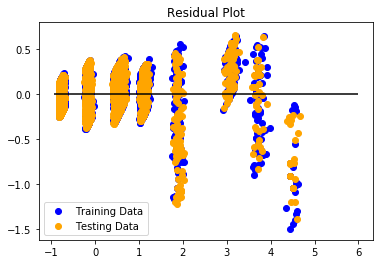

In [13]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.04082957584708617, R2: 0.9604536680406474


In [15]:
print(f"{predictions}")

[[ 0.43836901]
 [-0.75087688]
 [-0.17548142]
 ...
 [-0.78848424]
 [ 1.17372075]
 [ 0.59430732]]


In [16]:
X_test_scaled

array([[-0.5633489 , -0.74085555, -1.01064055, ...,  0.80352078,
        -0.65977757, -0.31266022],
       [-0.36948168,  0.03915193, -1.01064055, ...,  0.80352078,
        -0.65977757, -0.31266022],
       [-0.62556066,  0.05074528, -1.01064055, ..., -1.24452288,
         1.51566231, -0.31266022],
       ...,
       [-0.80397988, -0.71709828, -1.01064055, ...,  0.80352078,
        -0.65977757, -0.31266022],
       [ 0.13890771,  2.22767828, -1.01064055, ..., -1.24452288,
         1.51566231, -0.31266022],
       [ 0.06486008, -0.18965888,  0.98947148, ..., -1.24452288,
        -0.65977757,  3.19836024]])